# __Analysis of the growth and distribution of registered companies in Nepal__

#### _-Piyush R._

Nepal has been enabling the development of new firms for around 86 years, beginning with the first registered company, "Biratnagar Jute Mill," in 1993 BS and continuing to new developing startups. As companies play an considerable part in the economic prosperity, their growth is always beneficial to the nation's economy.

The advancement of technology has undoubtedly aided the expansion of various businesses in recent years more than ever before. Startups are expanding across the country, from enterprises producing food and natural goods to computer startups developing software and IT solutions.

Bearing this in mind, I have gathered a collection of data comprising lists of various sorts of registered corporations/companies in various districts of Nepal from 2002 BS to 2072 BS.

So, let's conduct a comprehensive data analysis and evaluate the outcomes.

### __First, importing necessary python libraries:__

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In this data analysis project, we will use pandas for data analysis, cleaning, and exploration, and matplotlib for data visualization.

### __Next, importing necessary csv files.__

We have a total of 11 csv files, each consisting needed fiscal year's data.

Source: https://opendatanepal.com/

In [16]:
df1 = pd.read_csv('./csv_files/FY_2002-2062.csv')
dfs = []
for i in range(63, 73):
    filename = f'./csv_files/FY_20{i}.csv'
    dfs.append(pd.read_csv(filename))

df2 = pd.concat(dfs)
df = pd.concat([df1, df2])

Now that the files have been concatenated into a single data frame, let's observe the structure of data.

In [17]:
df.head()

,_id,ENGLISH_NAME,DISTRICT,COMPANY_TYPE,REGISTRATION_DATE
0,1,RAGHUPATI JUTE MILLS,Sankhuwasabha,Private,2003
1,2,MORANG SUGAR MILLS,Morang,Public,2003
2,3,NEW EVEREST CONSULTENCY,Lalitpur,Private,2004
3,4,HIRA LAXMI TRADERS,Kanchanpur,Private,2007
4,5,HIMALAYAN WOOLEN MILLS,Lalitpur,Private,2007


As we can see, the data is organized into five distinct columns.

### __Visualizing Data__

We will now visualize the data after careful examination in order to identify possible patterns.

##### Bar Plots:

First, determine the number of registered firms per company type. Then we'll create a bar graph that shows the number of registered firms by company type.

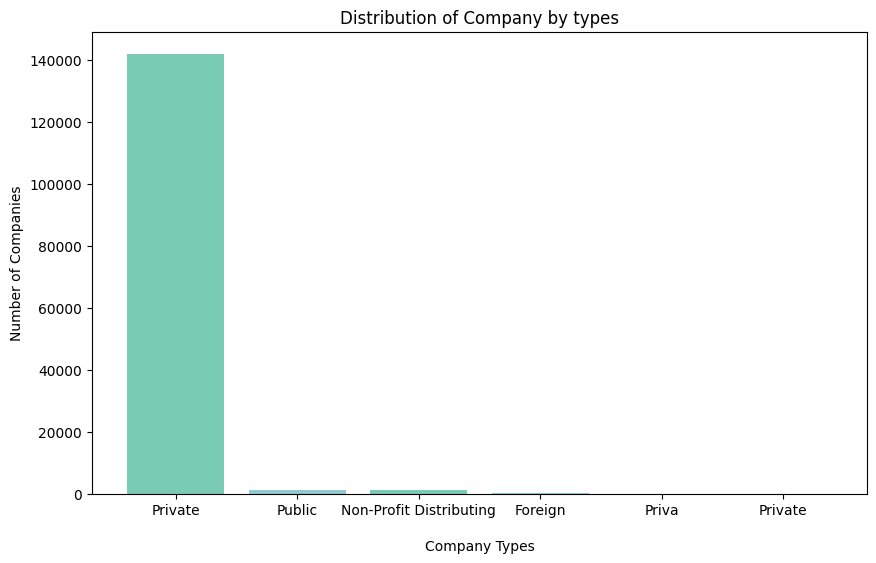

In [18]:
company_counts = df['COMPANY_TYPE'].value_counts()
plt.figure(figsize=(10,6))
plt.bar(company_counts.index, company_counts.values, color=['#79CCB3', '#92CAD1'])
plt.title('Distribution of Company by types')
plt.xlabel('Company Types')
plt.ylabel('Number of Companies')
plt.show()

According to the bar plot, the number of registered private firms is exponentially bigger than the other categories. In addition, we can see that there is a spelling error in the data frame.

Let's correct the spelling error by generating a new data frame and changing all the values in the company type column that begin with the word "Pri" to "Private," and plot the bar graph again.

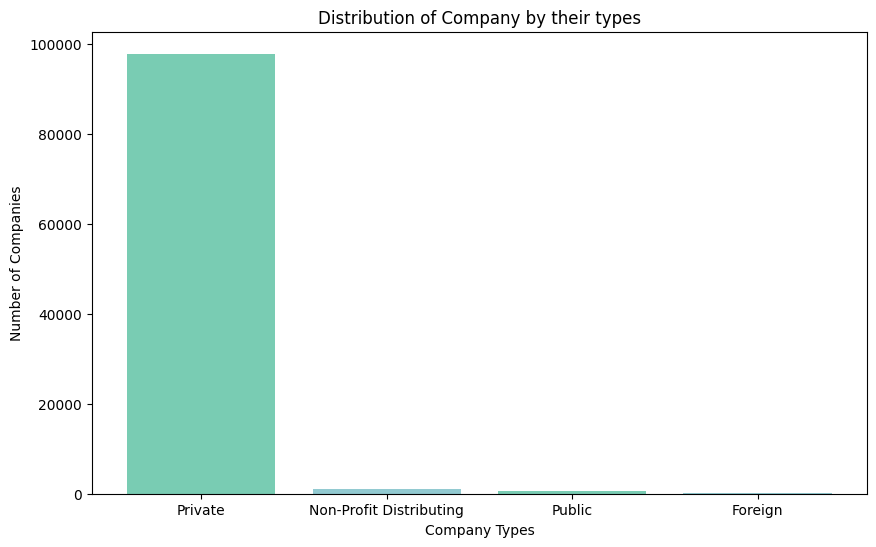

In [19]:
dfs = [df1, df2]
df_bar = df
for df_bar in dfs:
    df_bar.loc[df_bar['COMPANY_TYPE'].str.startswith('Pri'), 'COMPANY_TYPE'] = 'Private'

company_counts = df_bar['COMPANY_TYPE'].value_counts()
plt.figure(figsize=(10,6))
plt.bar(company_counts.index, company_counts.values, color=['#79CCB3', '#92CAD1'])
plt.title('Distribution of Company by their types')
plt.xlabel('Company Types')
plt.ylabel('Number of Companies')
plt.show()

Let us create another bar plot to show the distribution of firms based on their districts.

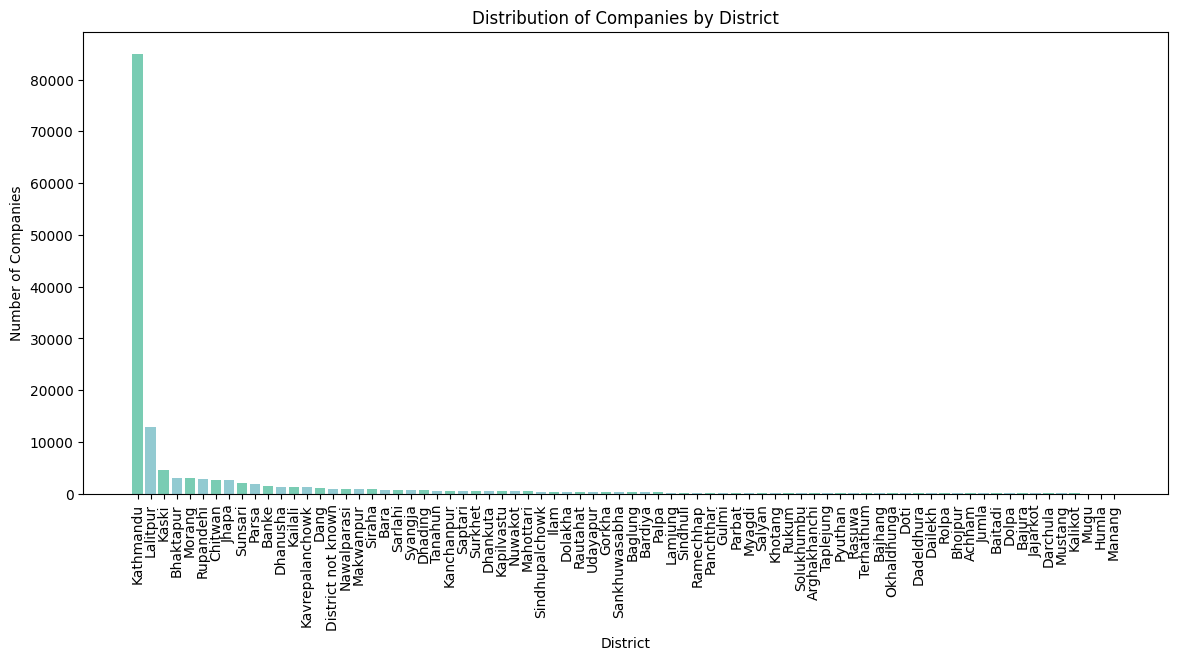

In [20]:
df = df[~df["DISTRICT"].str.contains("48")]
district_counts = df['DISTRICT'].value_counts()
plt.figure(figsize=(14,6))
plt.bar(district_counts.index, district_counts.values, color=['#79CCB3', '#92CAD1'])
plt.title('Distribution of Companies by District')
plt.xlabel('District')
plt.ylabel('Number of Companies')
plt.xticks(rotation=90)
plt.show()

The bar plot above shows that Kathmandu has the most registered firms, with Lalitpur and Kaski coming in second and third place, respectively.

The key explanation for this conclusion is likely to be because Kathmandu is Nepal's capital and has easy access to government and financial facilities.

##### Distributive Table:

Now, let's make a table that illustrates the distribution of companies based on their district and firm types. This will help us understand how different sorts of businesses have been dispersed across Nepal's districts.

In [21]:
table1 = df.groupby(['COMPANY_TYPE', 'DISTRICT']).size().unstack()
table1 = table1.loc[table1.sum(axis=1).sort_values(ascending=False).index]

table1

DISTRICT,Achham,Arghakhanchi,Baglung,Baitadi,Bajhang,Bajura,Banke,Bara,Bardiya,Bhaktapur,...,Sindhupalchowk,Siraha,Solukhumbu,Sunsari,Surkhet,Syangja,Tanahun,Taplejung,Terhathum,Udayapur
COMPANY_TYPE,,,,,,,,,,,,,,,,,,,,,
Private,75.0,118.0,278.0,64.0,104.0,53.0,1558.0,710.0,264.0,2972.0,...,419.0,900.0,126.0,1982.0,470.0,634.0,619.0,111.0,106.0,324.0
Public,1.0,NaN,3.0,1.0,NaN,NaN,8.0,5.0,NaN,15.0,...,4.0,3.0,2.0,23.0,2.0,5.0,1.0,1.0,1.0,1.0
Non-Profit Distributing,NaN,NaN,2.0,NaN,NaN,NaN,3.0,1.0,1.0,22.0,...,4.0,2.0,NaN,NaN,3.0,4.0,2.0,1.0,1.0,2.0
Foreign,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Priva\n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Private\n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In the table above, we can see a number of anomalies:

1. There are three rows for private enterprises.
2. An undesired column "48".
3. Table is too huge to fit, and so forth.

Let's clean these anomalies and show only the top ten districts with the most registered firms.

In [22]:
table1 = table1.iloc[:, 1:]
table1 = table1.drop("Private\n", axis=0)
table1 = table1.drop("Priva\n", axis=0)
table1 = table1[table1.sum().sort_values(ascending=False).index]
table1 = table1.iloc[:, :10]
table1.fillna(0, inplace=True)
table1.iloc[0, 0] += 2

table1

DISTRICT,Kathmandu,Lalitpur,Kaski,Bhaktapur,Morang,Rupandehi,Chitwan,Jhapa,Sunsari,Parsa
COMPANY_TYPE,,,,,,,,,,
Private,83473.0,12650.0,4455.0,2972.0,2967.0,2766.0,2648.0,2546.0,1982.0,1937.0
Public,798.0,65.0,38.0,15.0,28.0,34.0,22.0,11.0,23.0,13.0
Non-Profit Distributing,641.0,153.0,8.0,22.0,13.0,6.0,8.0,9.0,0.0,3.0
Foreign,82.0,23.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Now that the table has been cleansed, we can see that private corporations are the most registered companies, while foreign companies are the least.

Additionally, most of the companies have been registered in Kathmandu followed by Lalitpur, Kaski and so on.

##### Line Plot:

Let us plot a line graph depicting the percentage change in registered corporations from 2002 BS to 2072 BS.

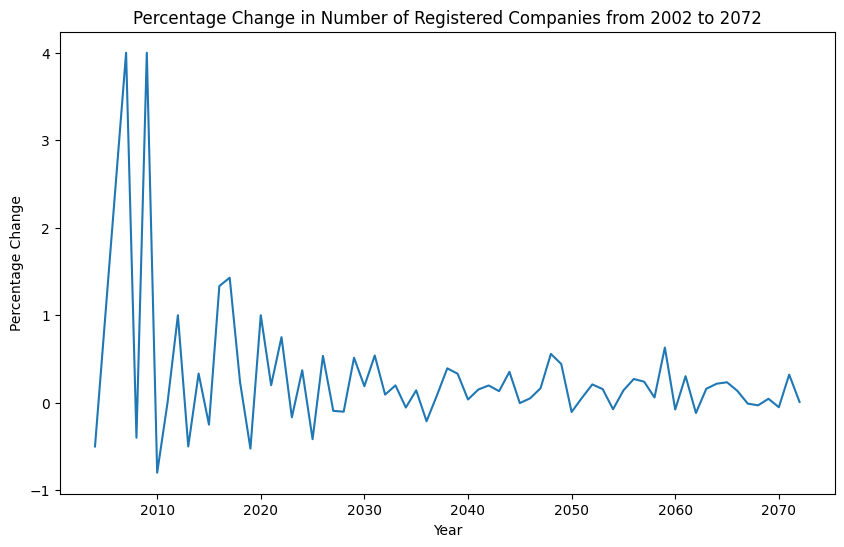

In [23]:
yearly_counts = df.groupby("REGISTRATION_DATE").size()
pct_change = yearly_counts.pct_change()
plt.figure(figsize=(10, 6))
plt.plot(pct_change.index, pct_change.values)
plt.title("Percentage Change in Number of Registered Companies from 2002 to 2072")
plt.xlabel("Year")
plt.ylabel("Percentage Change")
plt.show()

We can observe that the line plot is inconclusive. Therefore, let's correct the line graph to show the increase in the number of registered firms from 2002 BS to 2072 BS.

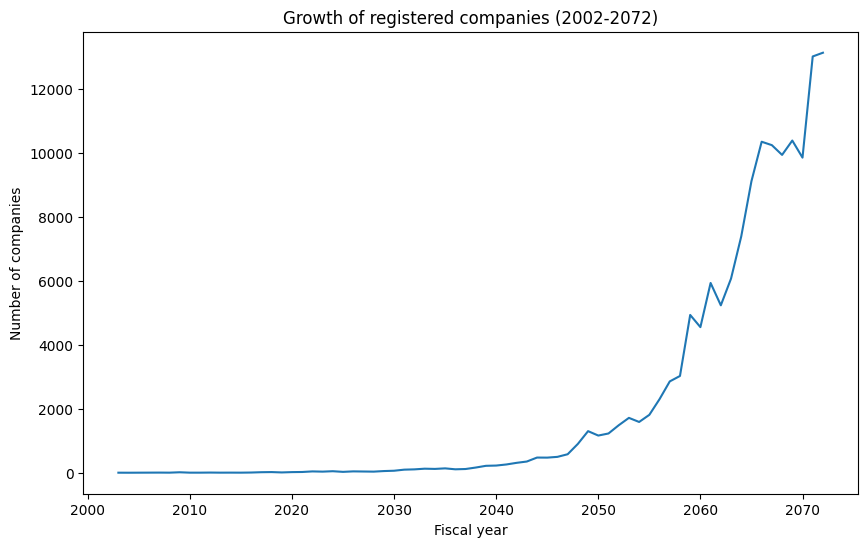

In [24]:
plt.figure(figsize=(10, 6))
df.groupby('REGISTRATION_DATE').size().plot(kind='line')
plt.title("Growth of registered companies (2002-2072)")
plt.xlabel("Fiscal year")
plt.ylabel("Number of companies")
plt.show()

We can see that the number of firms has increased exponentially over the last 70 years (2002 - 2072 BS), with periodic dips between 2060 and 2070.

### __Extracting Conclusions__

We have visualized data in bar and line plot, as well as generated a table.
All of these visualizations revealed clear patterns, and the following conclusions were reached:

1. The vast majority of registered corporations are privately owned.

2. Kathmandu has the largest number of registered firms.

3. The number of firms have expanded tremendously from 2002 to 2072 BS and will presumably keep expanding in years to come.


Lastly, let's compute the correlation between the increase in the number of firms and the respective years they were registered.

In [25]:
total_companies_by_year = df.groupby(['REGISTRATION_DATE'])['_id'].count().reset_index()
corr_coef = total_companies_by_year['REGISTRATION_DATE'].corr(total_companies_by_year['_id'])
print("Correlation coefficient: ", round(corr_coef, ndigits=3))

Correlation coefficient:  0.772


We got a correlation coefficient of 0.772.
Since, the coefficient calculated is more than 0.7, there is a strong positive correlation between the number of firms and their respective registration years. This indicates that the number of companies will continue to grow as the year progresses. 